# Neural network - basics

## Implementation

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from more_itertools import pairwise

np.random.seed(42)

h = lambda theta, x: 1. / (1. + np.exp(-theta.T @ x))
add_one = lambda v: np.vstack((np.ones((1, v.shape[1])), v))

def forward_propagation(x, theta):
    a = x
    for t in theta:
        a = h(t, add_one(a))
    return a

def forward_propagation_activations(x, theta):
    a = x
    act = [ add_one(a) ]
    for t in theta:
        a = h(t, add_one(a))
        act.append(add_one(a))
    return act

def cost_function(x, y, theta):
    hx = forward_propagation(x, theta)
    Ji = y * np.log(hx) + (1 - y) * np.log(1 - hx)
    return - 1. / Ji.shape[1] * np.sum(Ji)

def backward_propagation(x, y, theta):
    act = forward_propagation_activations(x, theta)
    delta = [ np.delete(act[-1], (0), axis=0) - y ]
    n = len(theta) - 1
    for i in range(n, 0, -1):
        d = np.delete(theta[i] @ delta[n - i] * act[i] * (1 - act[i]), (0), axis=0)
        delta.append(d)
    delta.reverse()
    return [ act[i] @ delta[i].T for i in range(len(delta)) ]

def gradient_descent(theta, x, y, k=1000, alpha=0.1):
    for _ in range(k):
        grad = backward_propagation(x, y, theta)
        for i in range(len(theta)):
            theta[i] = theta[i] - alpha * grad[i]
    return theta


## Binary classification problem

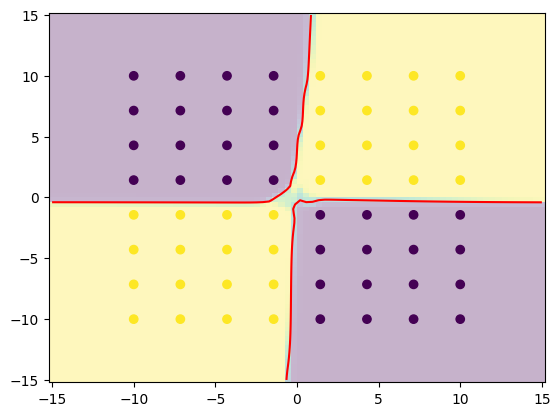

In [56]:
architecture = [2, 10, 10, 1]
theta = [10 * np.random.rand(i + 1, j) - 5 for i, j in pairwise(architecture)]

mesh_to_data = lambda p, q: np.hstack((p.flatten().reshape(p.size, 1), q.flatten().reshape(q.size, 1))).T

P, Q = np.meshgrid(
    np.linspace(-10, 10, 8), 
    np.linspace(-10, 10, 8)
)
x = mesh_to_data(P, Q)
y = np.zeros((1, x.shape[1]))
y[:, np.argwhere((P.flatten() >= 0) & (Q.flatten() >= 0))] = 1
y[:, np.argwhere((P.flatten() < 0) & (Q.flatten() < 0))] = 1

theta = gradient_descent(theta, x, y, k=5000, alpha=0.05)

V, W = np.meshgrid(
    np.linspace(-15, 15, 80), 
    np.linspace(-15, 15, 80)
)

Z = forward_propagation(x=mesh_to_data(V, W), theta=theta).reshape(V.shape)

fig, ax = plt.subplots()
ax.scatter(P, Q, c=y)
ax.pcolormesh(V, W, Z, alpha=.3)
ax.contour(V, W, Z, levels=[0.5], colors = ["red"])
plt.show()

## Multiclass classification problem

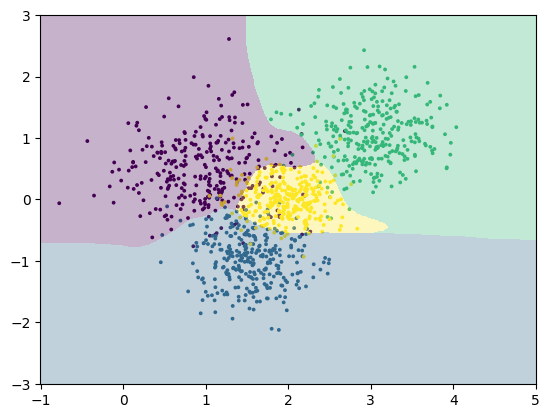

In [57]:
class_size = 300
samples = 4 * class_size

np.random.seed(42)
x = np.vstack((
    np.random.multivariate_normal(mean=[1, 0.5], cov=[[0.3, 0],[0, 0.3]], size=class_size),
    np.random.multivariate_normal(mean=[1.5, -1], cov=[[0.15, 0],[0, 0.15]], size=class_size),
    np.random.multivariate_normal(mean=[3, 1], cov=[[0.2, 0],[0, 0.2]], size=class_size),
    np.random.multivariate_normal(mean=[2, 0], cov=[[0.1, 0],[0, 0.1]], size=class_size),
)).T
c = np.zeros((samples, 1))
y = np.zeros((4, samples))

c[0 * class_size : 1 * class_size] = 0
c[1 * class_size : 2 * class_size] = 1
c[2 * class_size : 3 * class_size] = 2
c[3 * class_size : 4 * class_size] = 3

y[0, 0 * class_size : 1 * class_size] = 1
y[1, 1 * class_size : 2 * class_size] = 1
y[2, 2 * class_size : 3 * class_size] = 1
y[3, 3 * class_size : 4 * class_size] = 1

architecture = [2, 10, 10, 10, 4]
theta = [10 * np.random.rand(i + 1, j) - 5 for i, j in pairwise(architecture)]
theta = gradient_descent(theta, x, y, k=10_000, alpha=0.002)

V, W = np.meshgrid(
    np.linspace(-1, 5, 500), 
    np.linspace(-3, 3, 500)
)
Y = mesh_to_data(V, W)
Z = forward_propagation(x=mesh_to_data(V, W), theta=theta)
H = np.argmax(Z, axis=0).reshape(V.shape)

fig, ax = plt.subplots()
ax.scatter(x.T[:, 0], x.T[:, 1], c=c, s=3)
ax.pcolormesh(V, W, H, alpha=0.3)
plt.show()